# Data Cleaning and Analysis Script for CSCI526 ChestNut Game Entropy

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import os

file_name = 'ChestNut_Data_10-10.csv'

line = '\n=======================================================================================\n'

In [8]:
df = pd.read_csv(file_name)

In [9]:
df.drop(columns=['Timestamp'], inplace=True)

In [10]:
display(df)

,Player ID,Tag,Time
0,638008380431898,lv0-start,638008515575231
1,638008380431898,lv0-item-redcube,638008515668920
2,638008380431898,lv0-item-redcube,638008515723151
3,638008380431898,lv0-item-bluecube,638008515973296
4,638008380431898,lv0-item-bluecube,638008515975293
...,...,...,...
4396,638009521531898,lv3-start,638010109205049
4397,638009521531898,lv3-item-redcube,638010109305071
4398,638009521531898,lv3-item-redcube,638010109316404
4399,638009521531898,lv3-cp-1,638010109356597


In [11]:
gb = df.groupby('Player ID')    
player_list = [gb.get_group(x) for x in gb.groups]

In [12]:
start_list = ['lv0-start', 'lv1-start', 'lv2-start', 'lv3-start', 'lv4-start']
end_list = ['lv0-success', 'lv1-success', 'lv2-success', 'lv3-success', 'lv4-success',
            'lv0-death', 'lv1-death', 'lv2-death', 'lv3-death', 'lv4-death',
            'lv0-quit', 'lv1-quit', 'lv2-quit', 'lv3-quit', 'lv4-quit']
pause_list = ['lv0-pause', 'lv1-pause', 'lv2-pause', 'lv3-pause', 'lv4-pause']
resume_list = ['lv0-resume', 'lv1-resume', 'lv2-resume', 'lv3-resume', 'lv4-resume']
player_game_list = []

for player_df in player_list: 
    #display(player_df)

    #print(player_game_list)
    player_df = player_df.sort_values(['Time'], ascending=True)
    game_list = []
    started = -1
    seq_list = []
    for index, row in player_df.iterrows():
        if row['Tag'] in start_list:
            if started == -1:
                started = start_list.index(row['Tag'])
                seq_list.append([row['Tag'], row['Time']])
            else:
                started = start_list.index(row['Tag'])
                seq_list = []
                seq_list.append([row['Tag'], row['Time']])
        elif row['Tag'] in end_list:
            if started != -1:
                seq_list.append([row['Tag'], row['Time']])
                game_list.append(seq_list)
                seq_list = []
                started = -1
        elif started != -1:
                seq_list.append([row['Tag'], row['Time']])
        #display(row['Tag'])
    player_game_list.append([player_df.iloc[0]['Player ID'],game_list])
    

        

In [13]:
level_name = ['Level 0', 'Level 1', 'Level 2', 'Level 3', 'Level 4']



for item in player_game_list:
    print(line)
    print('Player ID: %d'%(item[0]))
    for game in item[1]:
        print('\nPlayed Level %d'%(start_list.index(game[0][0])))
        for cp in game:
            print('%s '%(cp[0]), end='')
        print('\nGame Time: %f'%((game[len(game)-1][1] - game[0][1])/10000))
            



Player ID: 638008380431898

Played Level 0
lv0-start lv0-item-redcube lv0-item-redcube lv0-item-bluecube lv0-item-bluecube lv0-item-bluecube lv0-item-bluecube lv0-success 
Game Time: 44.926800

Played Level 0
lv0-start lv0-settings lv0-resume lv0-settings lv0-quit 
Game Time: 5.137000

Played Level 1
lv1-start lv1-item-redcube lv1-settings lv1-quit 
Game Time: 11.981400

Played Level 1
lv1-start lv1-settings lv1-quit 
Game Time: 6.029900

Played Level 2
lv2-start lv2-item-redcube lv2-item-redcube lv2-item-redcube lv2-settings lv2-quit 
Game Time: 16.846200

Played Level 2
lv2-start lv2-item-key lv2-item-bluecube lv2-item-redcube lv2-item-redcube lv2-settings lv2-quit 
Game Time: 23.408200

Played Level 2
lv2-start lv2-item-redcube lv2-item-redcube lv2-cp-2 lv2-item-redcube lv2-item-key lv2-item-bluecube lv2-death 
Game Time: 57.597000

Played Level 2
lv2-start lv2-cp-1 lv2-item-key lv2-item-redcube lv2-item-redcube lv2-cp-2 lv2-item-key lv2-item-key lv2-cp-3 lv2-item-key lv2-item-blu

Game Time: 39.906100

Played Level 0
lv0-start lv0-item-bluecube lv0-item-bluecube lv0-item-bluecube lv0-item-bluecube lv0-item-bluecube lv0-cp-0 lv0-item-redcube lv0-item-redcube lv0-item-redcube lv0-death 
Game Time: 95.033200

Played Level 0
lv0-start lv0-item-bluecube lv0-item-bluecube lv0-item-bluecube lv0-item-bluecube lv0-item-bluecube lv0-cp-0 lv0-item-redcube lv0-item-redcube lv0-item-redcube lv0-item-redcube lv0-death 
Game Time: 68.106200

Played Level 0
lv0-start lv0-item-bluecube lv0-item-bluecube lv0-item-bluecube lv0-item-bluecube lv0-item-bluecube lv0-cp-0 lv0-item-redcube lv0-item-redcube lv0-item-redcube lv0-item-redcube lv0-pause lv0-resume lv0-death 
Game Time: 139.535900

Played Level 0
lv0-start lv0-item-bluecube lv0-item-bluecube lv0-item-bluecube lv0-item-bluecube lv0-item-bluecube lv0-cp-0 lv0-item-redcube lv0-item-redcube lv0-item-redcube lv0-item-redcube lv0-death 
Game Time: 44.895600

Played Level 0
lv0-start lv0-item-bluecube lv0-item-bluecube lv0-item-blu

In [14]:
sorted_data = [[[],[],[]],[[],[],[]],[[],[],[]],[[],[],[]],[[],[],[]]]
#sorted_data schema: [#level:[ #succes:[], #died:[], #quit:[] ] ]

for item in player_game_list:
    #print(line)
    #print('Player ID: %d'%(item[0]))
    for game in item[1]:
        pause_time = 0
        pause_start = 0
        pause = False
        for cp in game:
            if cp[0] in pause_list:
                pause_start = cp[1] 
                pause = True
            elif pause and (cp[0] in resume_list or cp[0] in end_list):
                pause_time += cp[1] - pause_start
                pause = False
                
        game_time = ((game[len(game)-1][1] - game[0][1]) - pause_time)/10000
        level = start_list.index(game[0][0])
        ending = int(end_list.index(game[len(game)-1][0]) / 5)
        #print(game_time)
        #print(pause_time)
        #print('level %d, ending %d'%(level,ending))
        sorted_data[level][ending].append([game, game_time])

In [31]:

level_labels = ['Level 0', 'Level 1', 'Level 2', 'Level 3', 'Level 4']
def game_stat_painter(labels, sub_labels, data, title, unit, sub_color = None, x_rotation = 0, label_format = '%d'):
    label_size = 12
    font_size = 18
    title_size = 22
    bar_count = len(data[0])
    
    if bar_count != len(sub_labels):
        print('Wrong Input Size!')
        return 
    
    bar_width = 0.7 / bar_count
    
    x = np.arange(len(labels))  # the label locations
    fig, ax = plt.subplots(figsize=(15, 10))
    for i in range(bar_count):
        single_bar_data = [data_list[i] for data_list in data]
        offset = -0.35 + i*bar_width + (bar_width/2)
        if sub_color != None:
            rects = ax.bar(x+offset , single_bar_data, bar_width, label=sub_labels[i], color = sub_color[i])
        else:
            rects = ax.bar(x+offset , single_bar_data, bar_width, label=sub_labels[i])
        if x_rotation != 0:    
            ax.bar_label(rects, fmt = label_format, padding=3, fontsize = label_size, rotation='vertical') 
        else:
            ax.bar_label(rects, fmt = label_format, padding=3, fontsize = label_size)
    
    ax.set_ylabel(unit, fontsize = font_size)
    ax.set_title(title, fontsize = title_size)
    if x_rotation != 0:
        ax.set_xticks(x, ha="right", rotation = x_rotation, rotation_mode="anchor")
    else:
        ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.tick_params(axis='both', which='both', labelsize=font_size)
    plt.margins(y=0.2)
    ax.legend(fontsize = font_size)
    #fig.tight_layout()
    plt.show()

In [32]:
avg_play_time = []
for i in range(5):
    avg_play_time.append([0,0,0])
    
#succes:[], #died:[], #quit:[]

for lv in range(5):
    for i in range(3):
        sum = 0
        counter = 0
        for item in sorted_data[lv][i]:
            counter += 1
            sum += item[1]
        avg_time = sum / counter
        avg_play_time[lv][i] = avg_time
    
        print('Average level game time for %d level%d is %fS'%(i,sorted_data.index(level), avg_time))
print(avg_play_time)

Average level game time for 0 level4 is 66.673043S
Average level game time for 1 level4 is 68.825627S
Average level game time for 2 level4 is 16.676626S
Average level game time for 0 level4 is 79.853436S
Average level game time for 1 level4 is 59.282425S
Average level game time for 2 level4 is 43.708737S
Average level game time for 0 level4 is 94.529213S
Average level game time for 1 level4 is 70.043829S
Average level game time for 2 level4 is 22.176367S
Average level game time for 0 level4 is 162.172130S
Average level game time for 1 level4 is 58.969458S
Average level game time for 2 level4 is 27.832189S
Average level game time for 0 level4 is 184.854000S
Average level game time for 1 level4 is 60.240559S
Average level game time for 2 level4 is 27.292825S
[[66.67304333333333, 68.82562666666666, 16.676625925925926], [79.85343636363638, 59.282424999999996, 43.70873684210526], [94.52921304347824, 70.04382941176472, 22.176366666666667], [162.17213, 58.96945789473684, 27.83218888888889], [

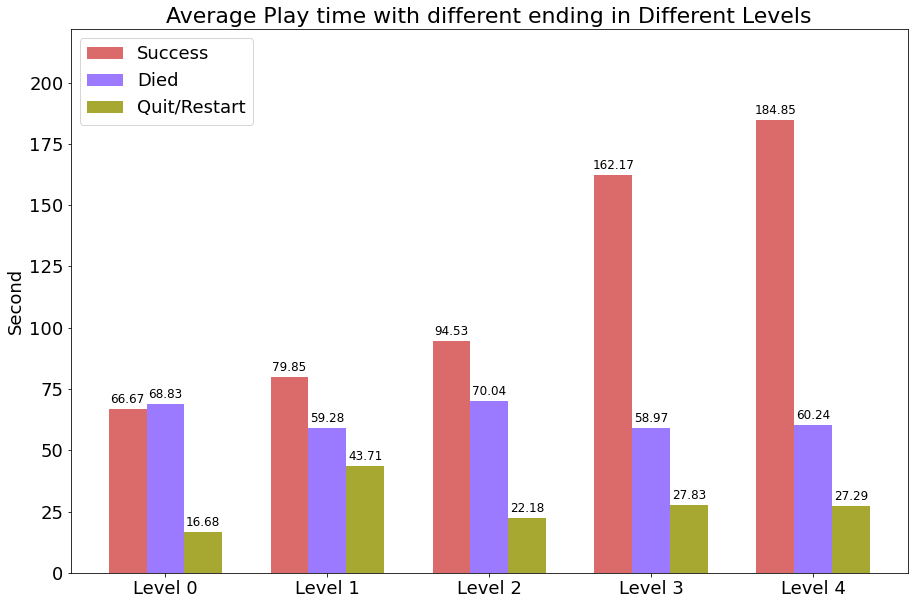

In [34]:
game_stat_painter(level_labels, ['Success', 'Died', 'Quit/Restart'], 
                    avg_play_time, 'Average Play time with different ending in Different Levels', 'Second', 
                  sub_color=['#db6b6b', '#9c7aff', '#a6a832'], label_format= '%.2f')

In [207]:
for level in sorted_data:
    sum = 0
    counter = 0
    for item in level[1]:
        counter += 1
        sum += item[1]
    avg_time = sum / counter
    print('Average level game time for level%d is %fS'%(sorted_data.index(level), avg_time))

Average level game time for level0 is 68.825627S
Average level game time for level1 is 59.282425S
Average level game time for level2 is 70.043829S
Average level game time for level3 is 58.969458S
Average level game time for level4 is 60.240559S


In [208]:
for level in sorted_data:
    sum = 0
    counter = 0
    for item in level[2]:
        counter += 1
        sum += item[1]
    avg_time = sum / counter
    print('Average level game time for level%d is %fS'%(sorted_data.index(level), avg_time))

Average level game time for level0 is 16.676626S
Average level game time for level1 is 43.708737S
Average level game time for level2 is 22.176367S
Average level game time for level3 is 27.832189S
Average level game time for level4 is 27.292825S


## Collected Items

In [210]:
#item_count format: #level:[ #red, #blue, #key ] cp format lv#-item-redcube
item_count = []


for i in range(5):
    item_count.append([0,0,0])

for i in range(len(sorted_data)):
    for game_list in sorted_data[i]:
        for game_data in game_list:
            for check_pts in game_data[0]:
                if 'redcube' in check_pts[0]:
                    item_count[int(check_pts[0][2])][0] += 1
                elif 'bluecube' in check_pts[0]:
                    item_count[int(check_pts[0][2])][1] += 1
                elif 'key' in check_pts[0]:
                    item_count[int(check_pts[0][2])][2] += 1
                    
print(item_count )

[[150, 244, 0], [109, 111, 3], [231, 293, 100], [379, 357, 117], [115, 131, 12]]


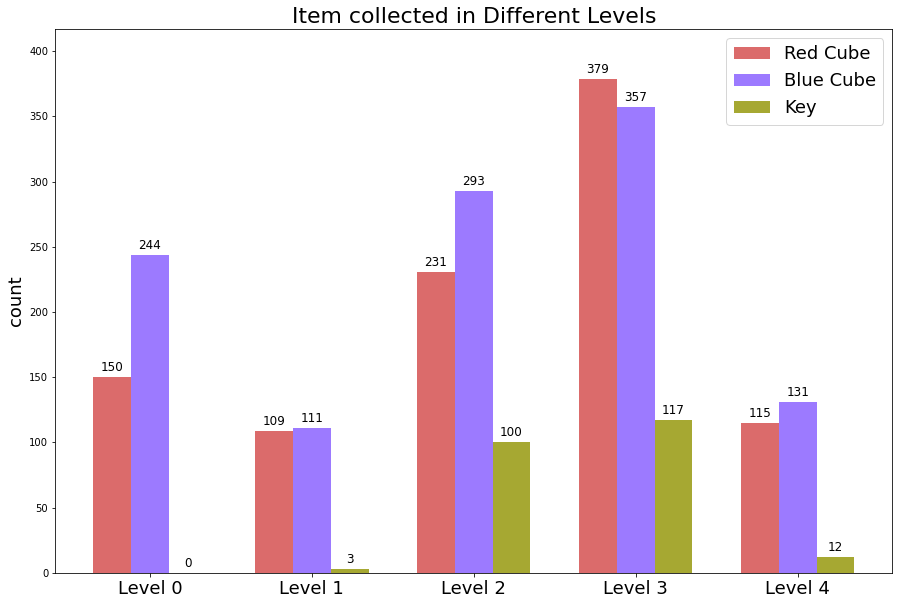

In [211]:
game_stat_painter(level_labels, ['Red Cube', 'Blue Cube', 'Key'], 
                  item_count, 'Item collected in Different Levels', 'count', sub_color=['#db6b6b', '#9c7aff', '#a6a832'])

In [212]:
#item_count format: #level:[ #red, #blue, #key ] cp format lv#-item-redcube
succ_item_count = []

#sorted_data schema: [#level:[ #succes:[], #died:[], #quit:[] ] ]

for i in range(5):
    succ_item_count.append([0,0,0])

for i in range(len(sorted_data)):
    success_time = len(sorted_data[i][0])
    for game_data in sorted_data[i][0]:
        for check_pts in game_data[0]:
            if 'redcube' in check_pts[0]:
                succ_item_count[int(check_pts[0][2])][0] += 1
            elif 'bluecube' in check_pts[0]:
                succ_item_count[int(check_pts[0][2])][1] += 1
            elif 'key' in check_pts[0]:
                succ_item_count[int(check_pts[0][2])][2] += 1

for i in range(5):
    for j in range(3):
        succ_item_count[i][j] /= len(sorted_data[i][0])
print(succ_item_count)

[[2.6, 5.733333333333333, 0.0], [2.1818181818181817, 2.5454545454545454, 0.045454545454545456], [3.9130434782608696, 5.956521739130435, 2.0434782608695654], [7.8, 7.2, 4.3], [5.5, 6.125, 0.75]]


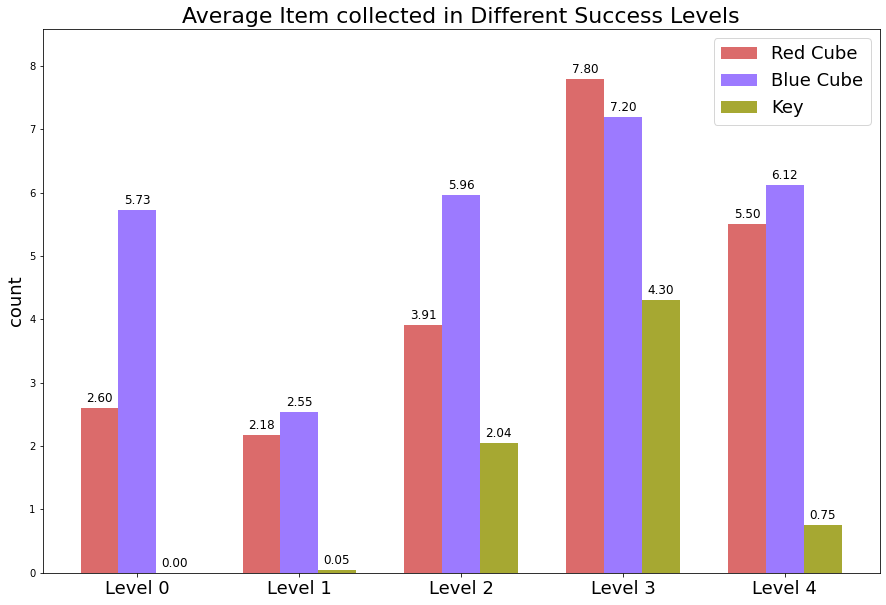

In [222]:
game_stat_painter(level_labels, ['Red Cube', 'Blue Cube', 'Key'], 
                  succ_item_count, 'Average Item collected in Different Success Levels', 'count', sub_color=['#db6b6b', '#9c7aff', '#a6a832'], label_format='%.2f')

## Game Play Stat

In [214]:
#Statistics format: #level:[ #Start Count, #Death Count, #Quit Count, #Success Count ]
statistics = []

for i in range(len(sorted_data)):
    succ_count = len(sorted_data[i][0])
    died_count = len(sorted_data[i][1])
    quit_count = len(sorted_data[i][2])
    statistics.append([succ_count + died_count + quit_count, died_count, quit_count, succ_count])



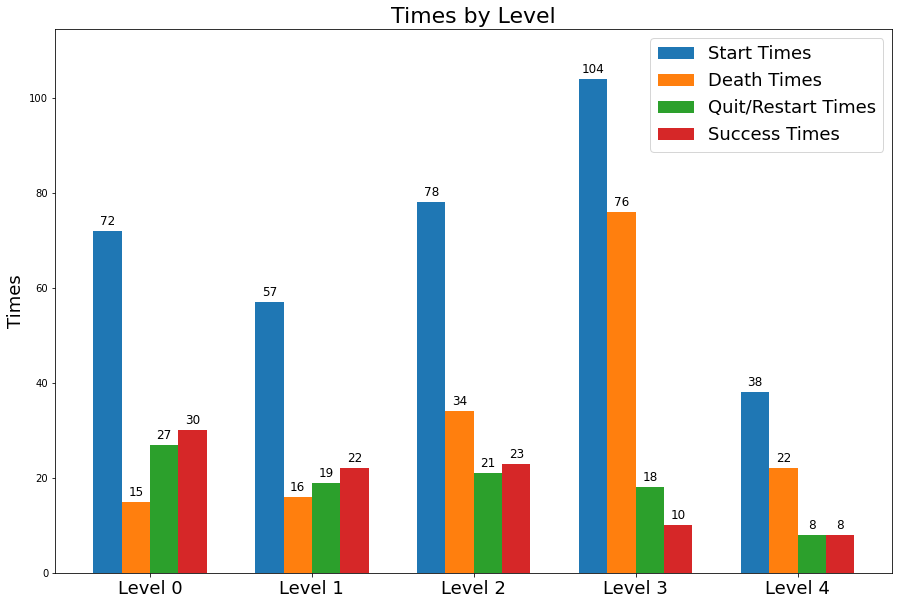

In [224]:
game_stat_painter(level_labels, ['Start Times', 'Death Times', 'Quit/Restart Times', 'Success Times'], 
                  statistics, 'Times by Level', 'Times')

## Check Point Stat

In [228]:
#level_cp_stat format: #level:[ #cp1_count, .... ] cp format lv#-cp-#
level_cp_stat = []


for i in range(5):
    level_cp_stat.append([])

for i in range(len(sorted_data)):
    for game_list in sorted_data[i]:
        for game_data in game_list:
            for check_pts in game_data[0]:
                if 'cp' in check_pts[0]:
                    cp_num = int(check_pts[0][-1])
                    lv_num = int(check_pts[0][2])
                    if len(level_cp_stat[lv_num]) < cp_num+1:
                        for i in range(cp_num - len(level_cp_stat[lv_num]) + 1):
                            level_cp_stat[lv_num].append(0)
                    level_cp_stat[lv_num][cp_num] += 1
                    
print(level_cp_stat)

[[17, 7], [7, 3], [11, 19, 25, 13, 8, 9], [45, 58, 68, 25, 19, 19, 17, 3, 15, 9], [21, 15, 13, 11, 14, 16, 7, 7, 8]]


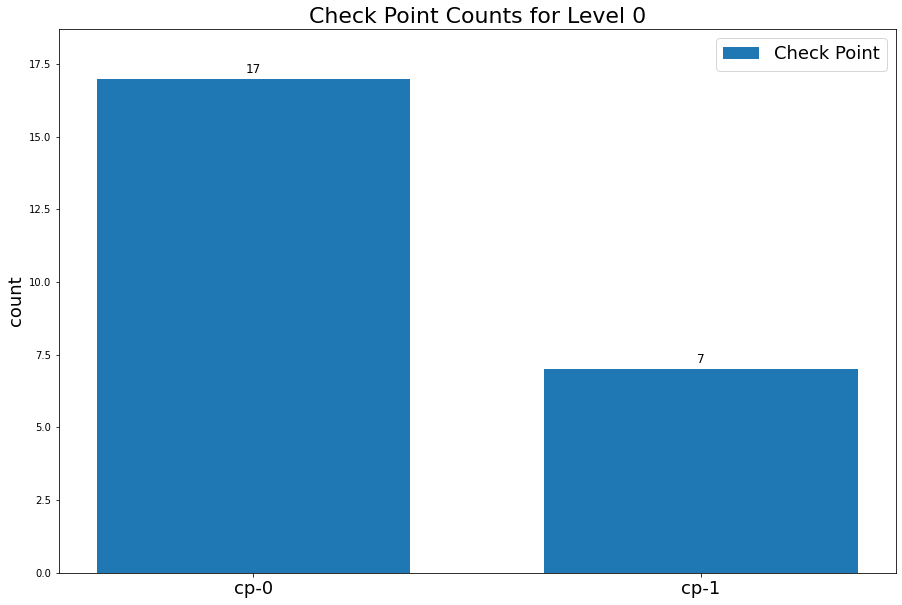

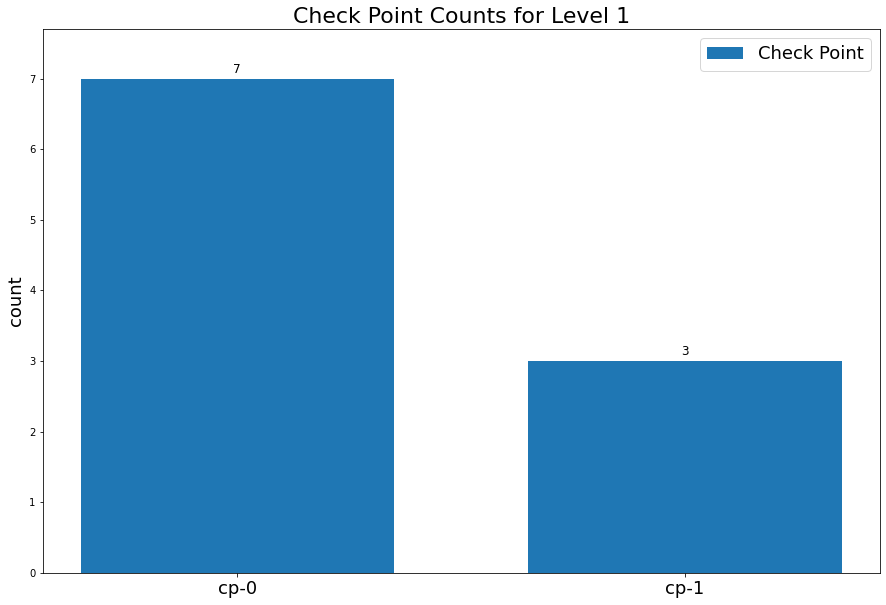

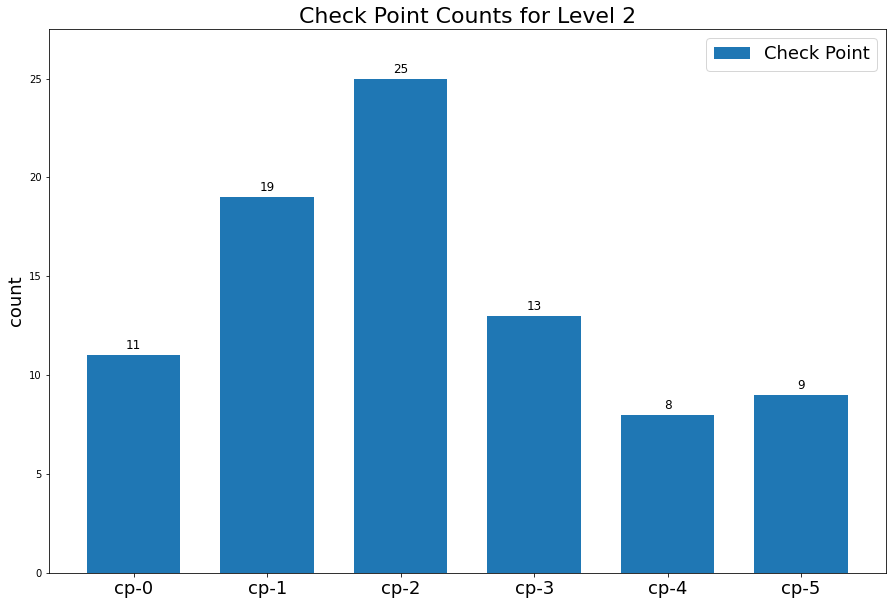

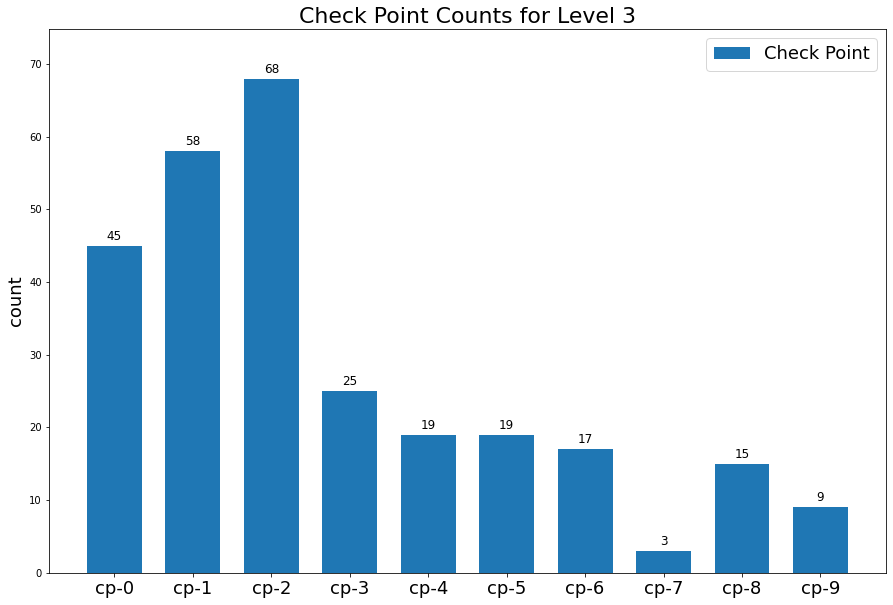

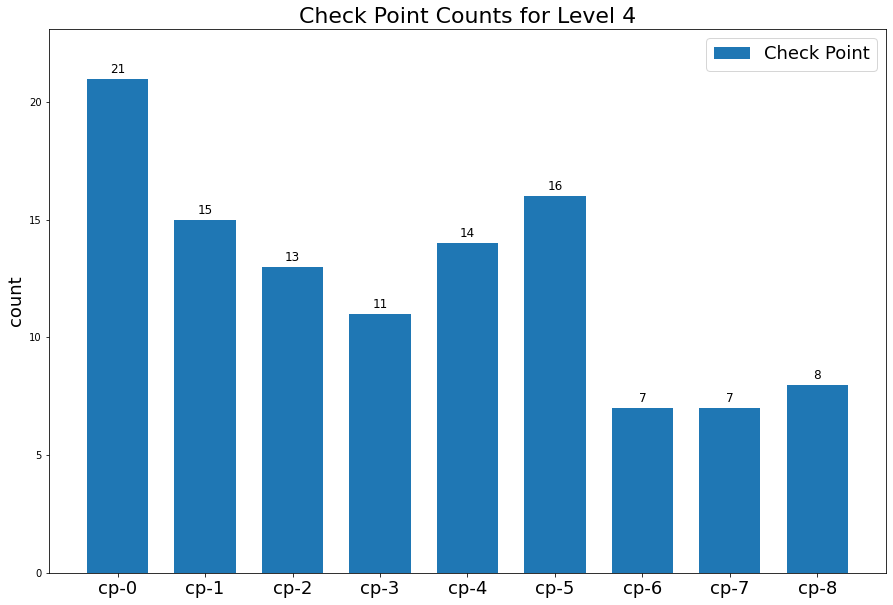

In [229]:
for i in range(5):
    game_stat_painter(['cp-'+str(i) for i in range(len(level_cp_stat[i]))], ['Check Point'], 
                      [[count] for count in level_cp_stat[i]], 'Check Point Counts for Level ' + str(i), 'count')

In [230]:
avg_level_cp_stat = []
for i in range(len(level_cp_stat)):
    avg_count = []
    for cp_count in level_cp_stat[i]:
        avg_count.append(cp_count / statistics[i][0])
    avg_level_cp_stat.append(avg_count)
print(avg_level_cp_stat)

[[0.2361111111111111, 0.09722222222222222], [0.12280701754385964, 0.05263157894736842], [0.14102564102564102, 0.24358974358974358, 0.32051282051282054, 0.16666666666666666, 0.10256410256410256, 0.11538461538461539], [0.4326923076923077, 0.5576923076923077, 0.6538461538461539, 0.2403846153846154, 0.18269230769230768, 0.18269230769230768, 0.16346153846153846, 0.028846153846153848, 0.14423076923076922, 0.08653846153846154], [0.5526315789473685, 0.39473684210526316, 0.34210526315789475, 0.2894736842105263, 0.3684210526315789, 0.42105263157894735, 0.18421052631578946, 0.18421052631578946, 0.21052631578947367]]


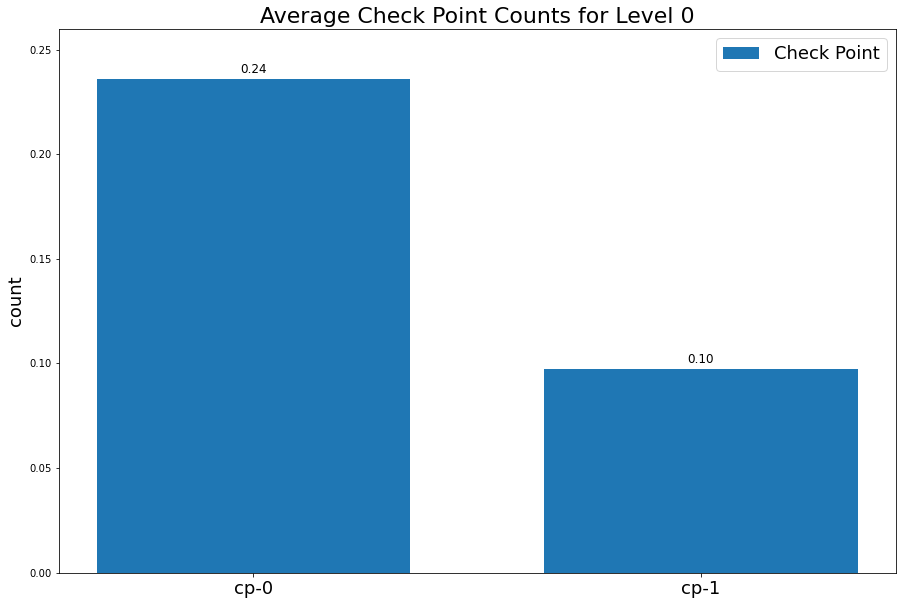

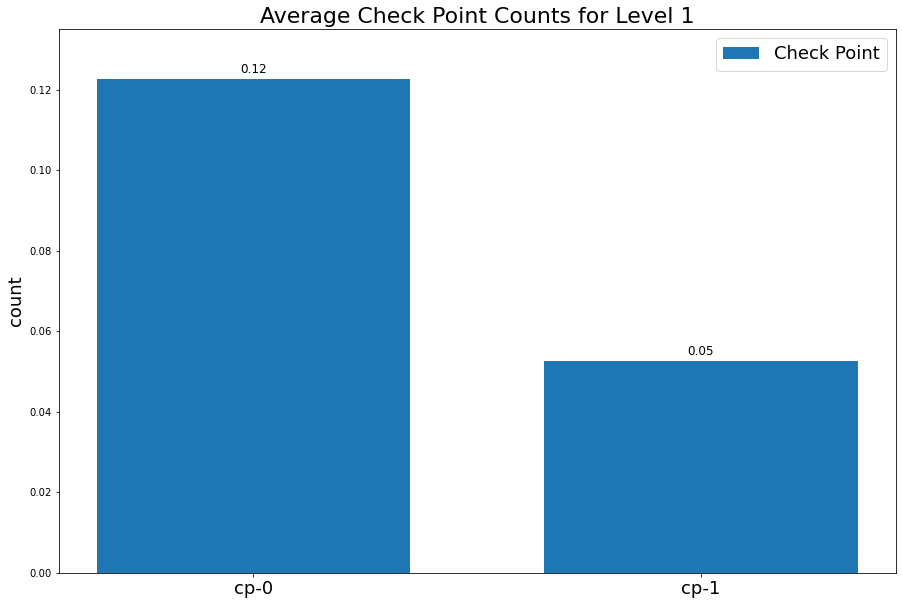

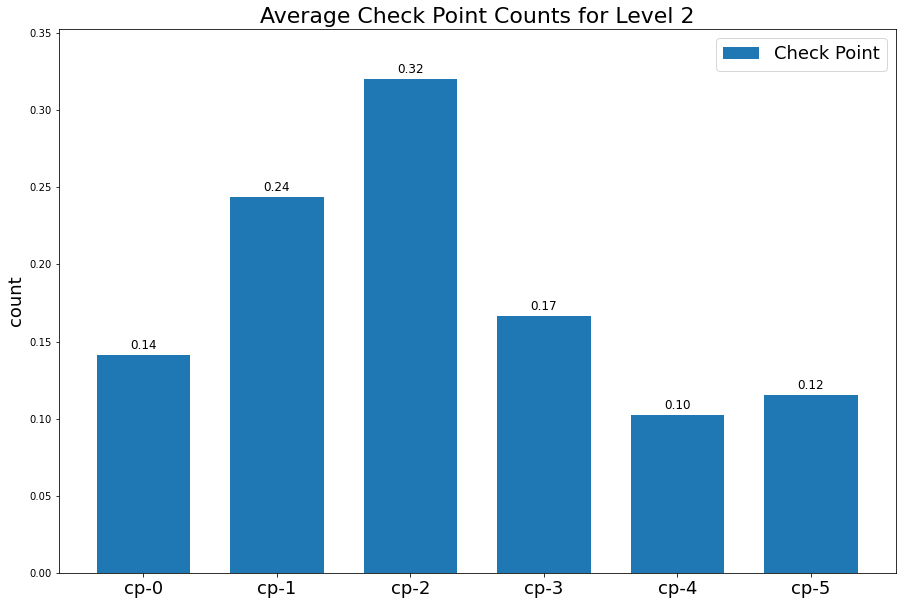

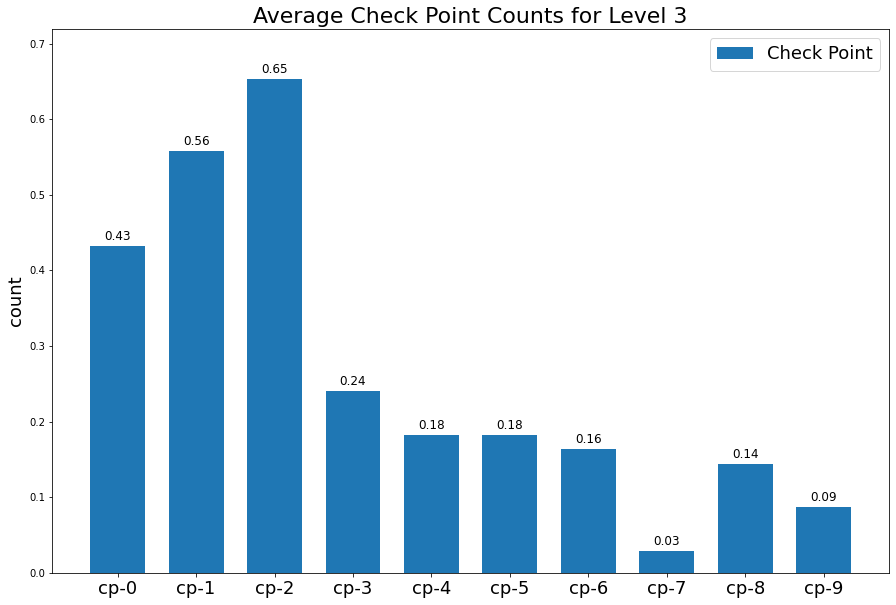

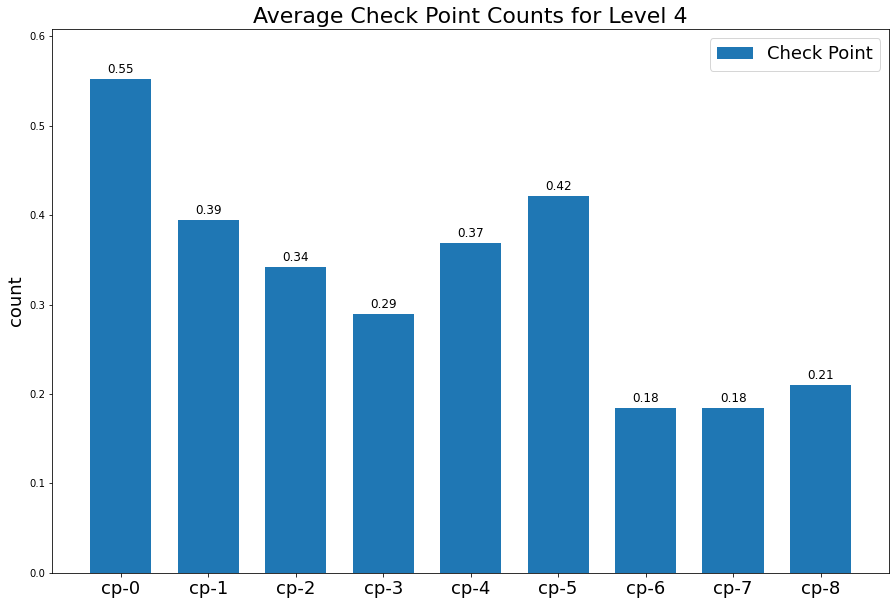

In [231]:
for i in range(5):
    game_stat_painter(['cp-'+str(i) for i in range(len(level_cp_stat[i]))], ['Check Point'], 
                      [[count] for count in avg_level_cp_stat[i]], 'Average Check Point Counts for Level ' + str(i), 'count', label_format='%.2f')

## Period Stat

In [232]:
#level_cp_stat format: #level:[ #cp1_count, .... ] cp format lv#-cp-#
level_cp_stat = []
movement_dict = []


for i in range(5):
    movement_dict.append({})

for i in range(len(sorted_data)):
    for game_list in sorted_data[i]:
        for game_data in game_list:
            cp_start = None
            start_time = 0
            pause_start = 0
            pause_time = 0
            for check_pts in game_data[0]:
                if any((cp_str in check_pts[0]) for cp_str in ['cp', 'start', 'quit', 'success', 'death']):
                    if cp_start != None:
                        level_num = int(check_pts[0][2])
                        time_period = check_pts[1] - start_time - pause_time
                        if time_period < 0:
                            print('Start time = %d, pause time = %d'%(start_time,pause_time))
                            print('current cp is %s, last cp is %s'%(check_pts[0],cp_start))
                        pause_time = 0
                        movement_tuple = (cp_start, check_pts[0])
                        if movement_tuple in movement_dict[level_num]:
                            movement_dict[level_num][movement_tuple].append(time_period)
                        else:
                            movement_dict[level_num][movement_tuple] = [time_period]
                    cp_start = check_pts[0]
                    start_time = check_pts[1]
                elif 'pause' in check_pts[0] or 'setting' in check_pts[0]:
                    pause_start = check_pts[1]
                elif 'resume' in check_pts[0]:
                    pause_time += check_pts[1] - pause_start
                    pause_start = 0
#print(movement_dict)

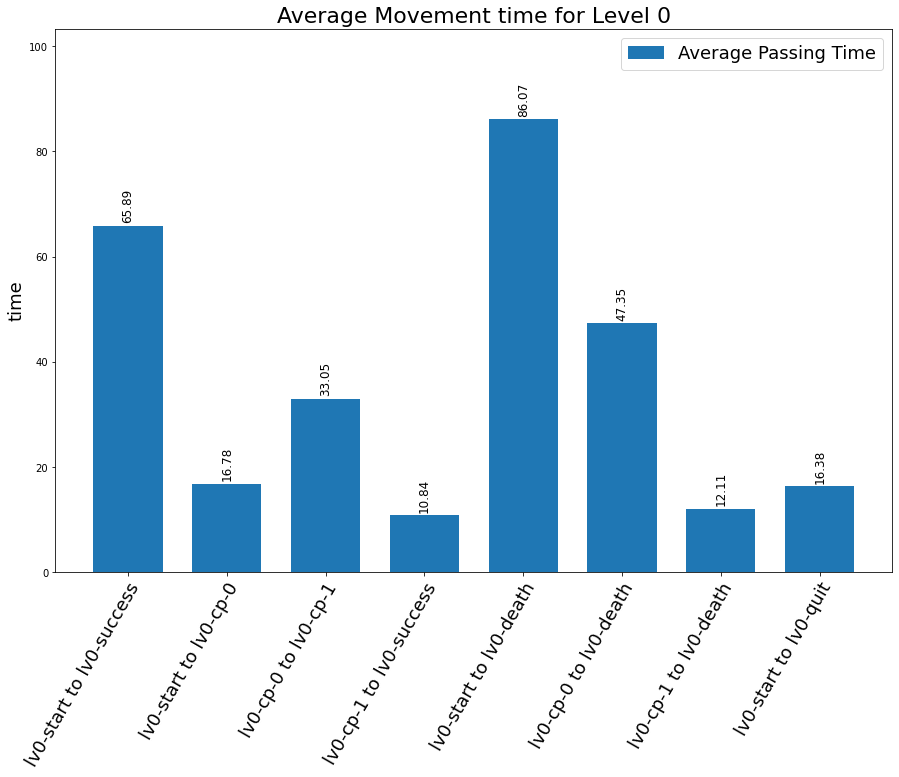

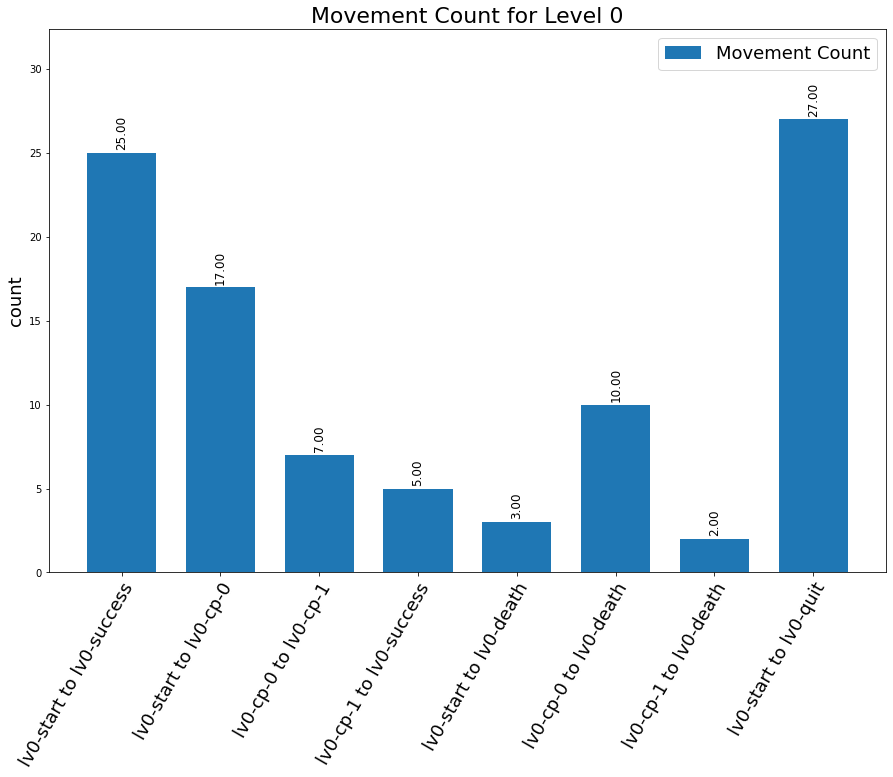

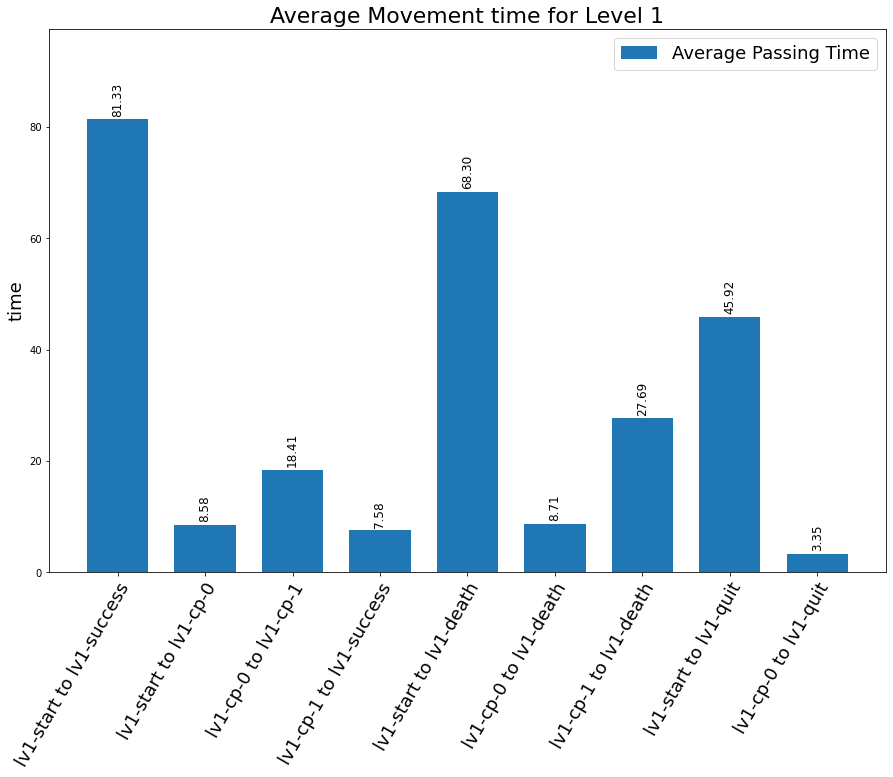

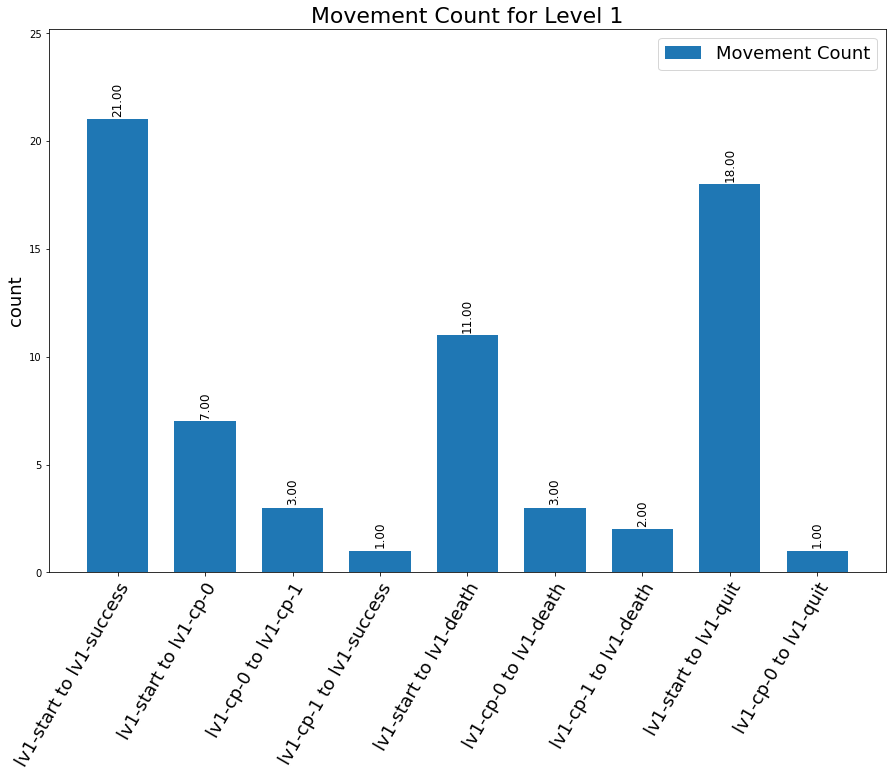

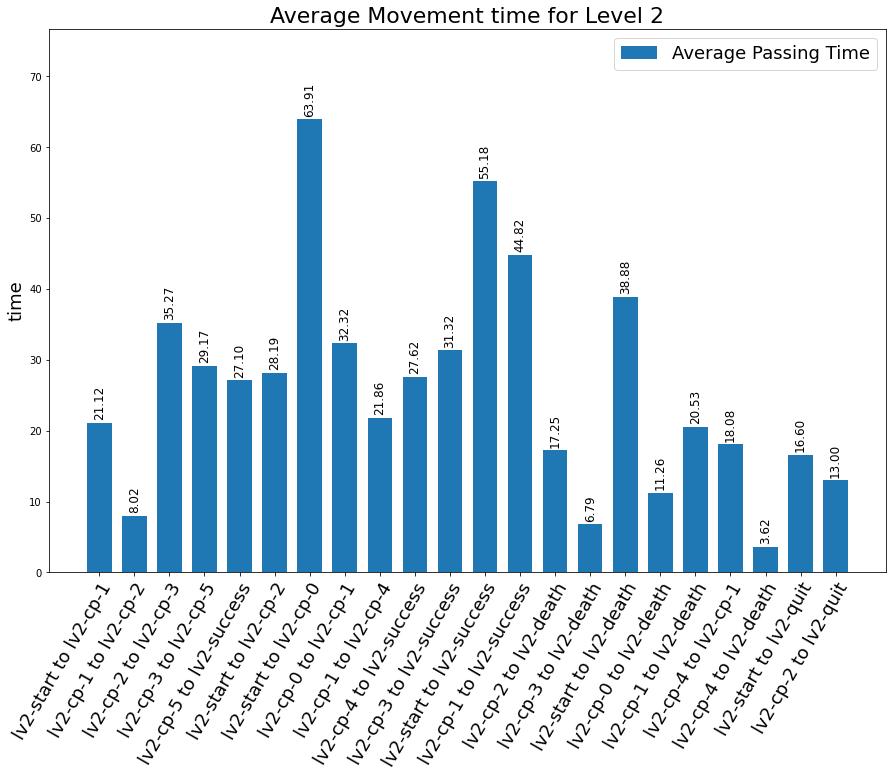

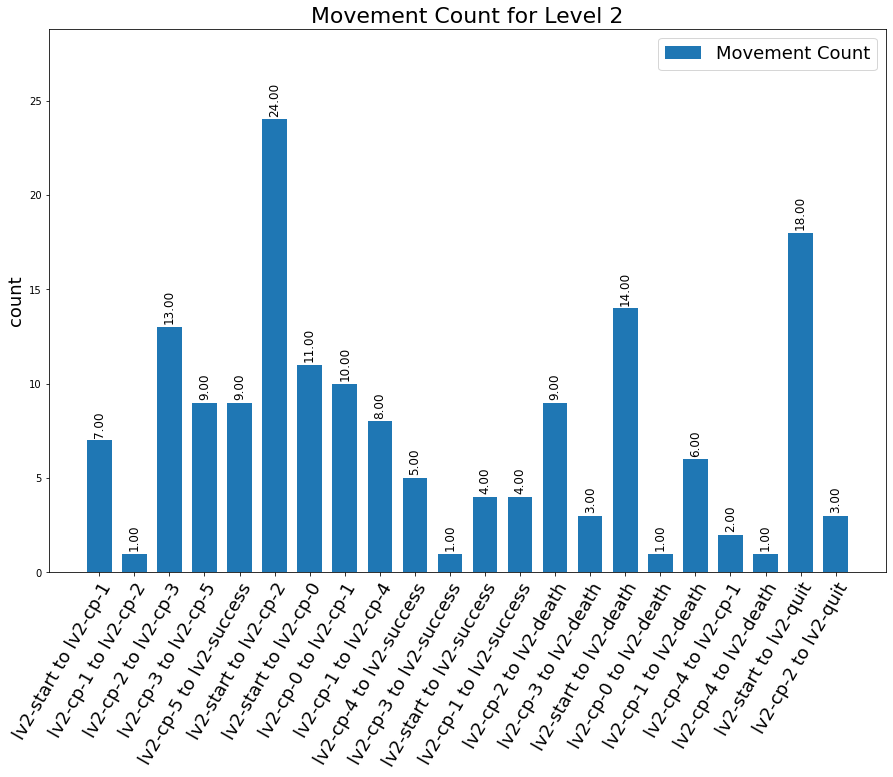

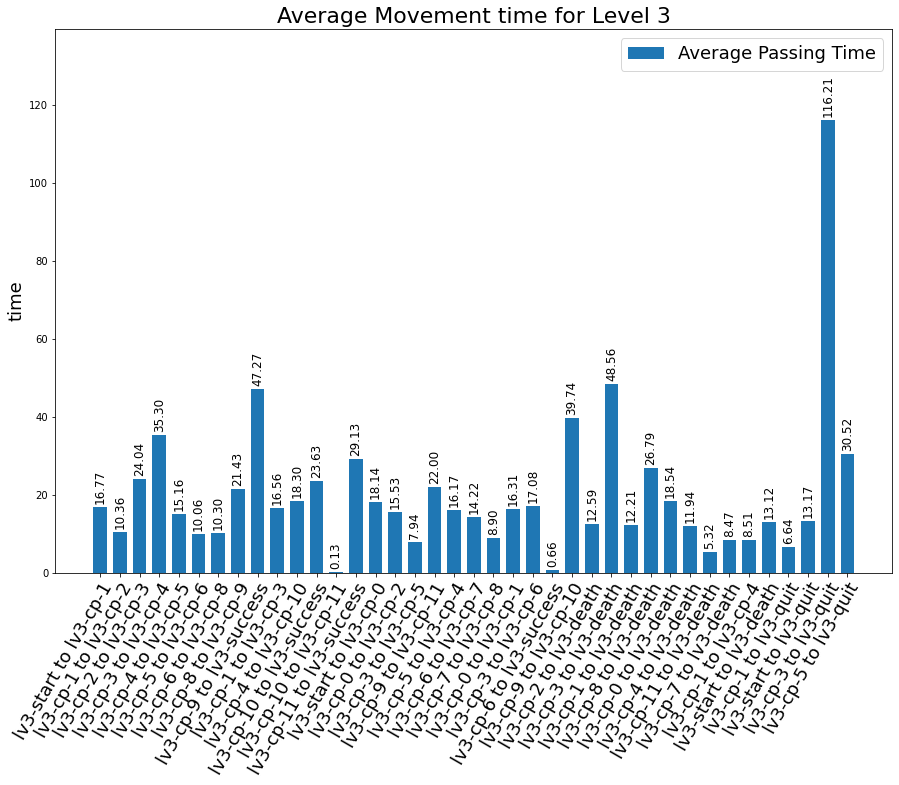

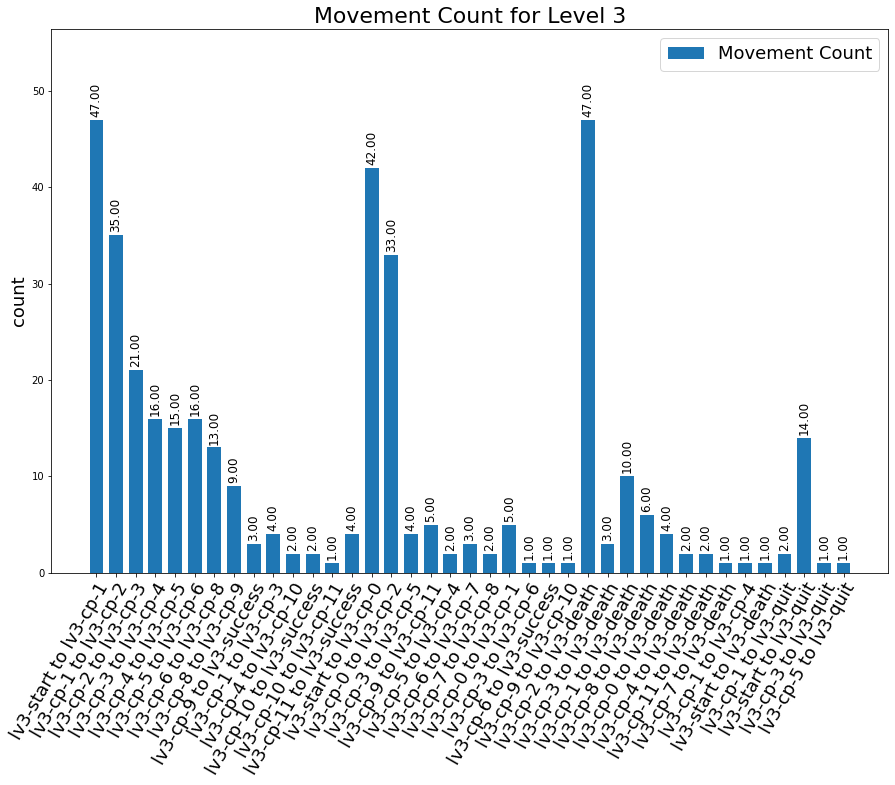

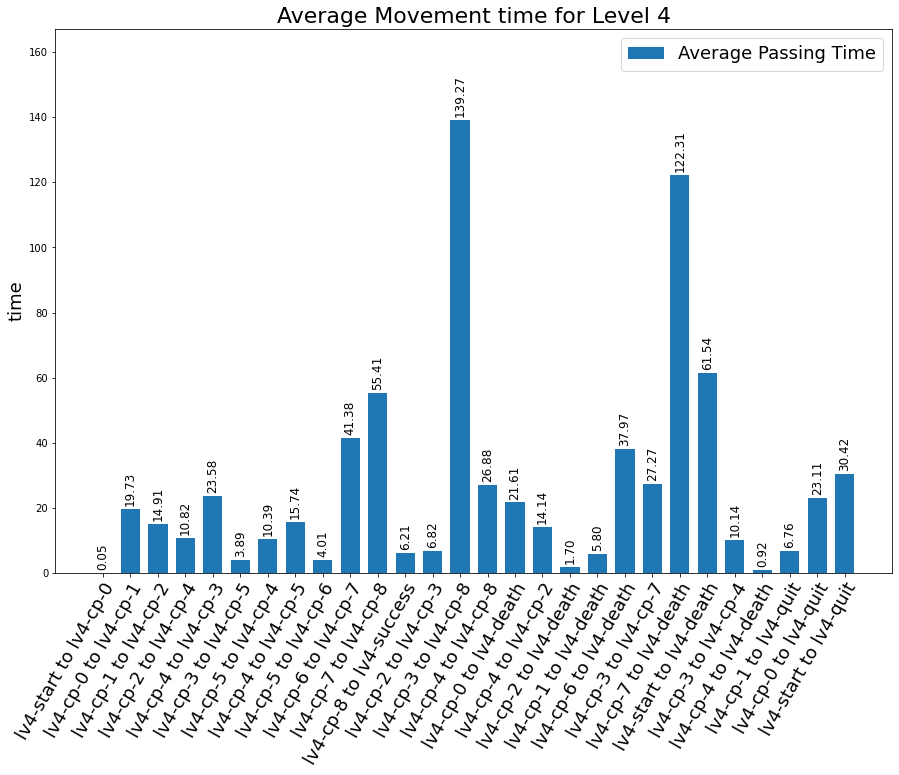

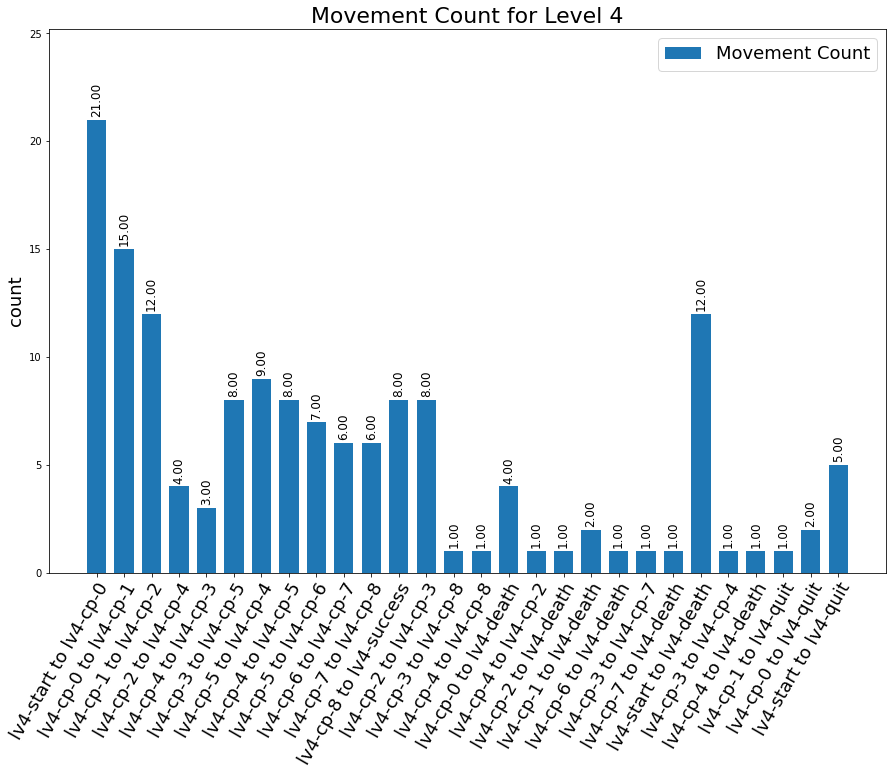

In [235]:
level_movement_label = []
level_movement_time_avg = []
level_movement_count = []


for i in range(5):
    level_movement_label.append([])
    level_movement_time_avg.append([])
    level_movement_count.append([])
    for movement, time_list in movement_dict[i].items():
        time_sum = 0
        for time in time_list:
            time_sum += time
        level_movement_label[i].append(movement[0] + ' to ' + movement[1])
        level_movement_time_avg[i].append(time_sum / len(time_list) / 10000)
        level_movement_count[i].append(len(time_list))

for i in range(5):
    game_stat_painter(level_movement_label[i], ['Average Passing Time'],
                      [[number] for number in level_movement_time_avg[i]], 'Average Movement time for Level ' + str(i), 'time', x_rotation= 60, label_format= '%.2f')
    game_stat_painter(level_movement_label[i], ['Movement Count'], 
                      [[number] for number in level_movement_count[i]], 'Movement Count for Level ' + str(i), 'count', x_rotation= 60, label_format= '%.2f')